# 분석 2주차 과제

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets # 내장 데이터 사용
from sklearn.model_selection import train_test_split # train, test 데이터 분할
from sklearn.linear_model import LinearRegression # 선형 회귀분석
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Linear Regression

### Data

In [83]:
from sklearn import datasets

boston = datasets.load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [85]:
# 데이터의 모양, 특성, 칼럼 파악

print(boston.keys()) # 딕셔너리 형식
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [94]:
# 데이터프레임으로 변환

data = pd.DataFrame(boston.data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
# 컬럼명을 feature_names로 변경

data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [96]:
# 특정 요인과 집값간의 상관관계를 분석해야 하는데 집값 데이터가 보이지 않음
# 집값 비교를 위해 target이라는 키에 저장되어 있는 집값을 불러와야 함

data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 산점도

<AxesSubplot:xlabel='RM', ylabel='Price'>

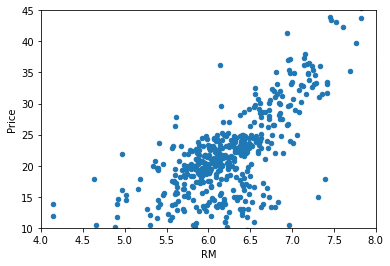

In [97]:
data.plot(kind = "scatter", x = "RM", y = "Price", xlim = (4, 8), ylim = (10, 45))

### linear regression

In [101]:
from sklearn.linear_model import LinearRegression

# sklearn 라이브러리의 LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 linear_regression에 저장
linear_regression = LinearRegression()

linear_regression.fit(X = pd.DataFrame(data['RM']), y = data['Price'])
prediction = linear_regression.predict(X = pd.DataFrame(data['RM']))

print('alpha=', linear_regression.intercept_) # y절편
print('beta=', linear_regression.coef_) # 기울기

alpha= -34.67062077643857
beta= [9.10210898]


In [103]:
# 잔차

residuals = y - prediction
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [104]:
# R_squared : 결정계수의 값이 클수록 모형의 예측 능력이 좋다고 본다

SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.4835254559913341


### 추정회귀직선 그리기

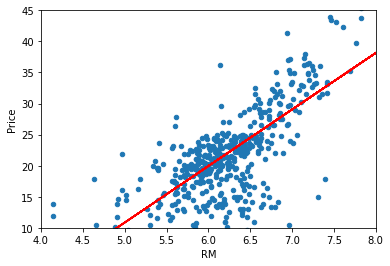

In [110]:
data.plot(kind = "scatter", x = 'RM', y = 'Price',  xlim = (4, 8), ylim = (10, 45))
plt.plot(data['RM'], prediction, color = 'red')

## 2. Multi Linear Regression

### Data

In [137]:
boston = datasets.load_boston()

# 데이터프레임 변환
data = pd.DataFrame(data = boston.data, columns = boston.feature_names)
data["Price"] = boston.target
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [138]:
# missing value 검사

print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64


### 상관관계 분석

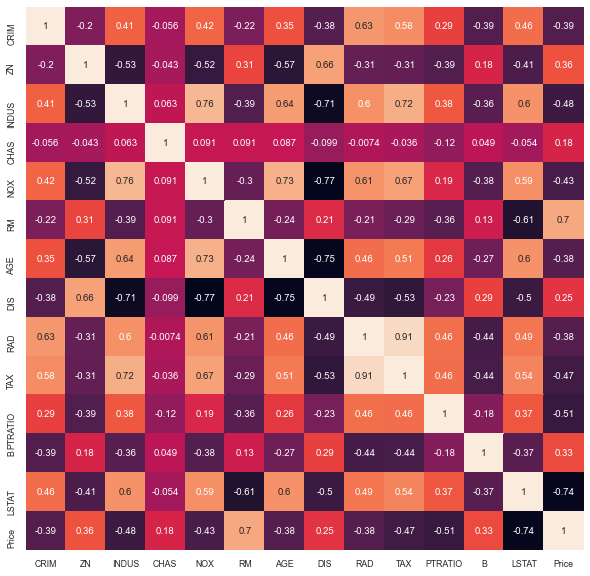

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
corr_matrix = data.corr()

# 히트맵
plt.figure(figsize=(10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

###  산점도

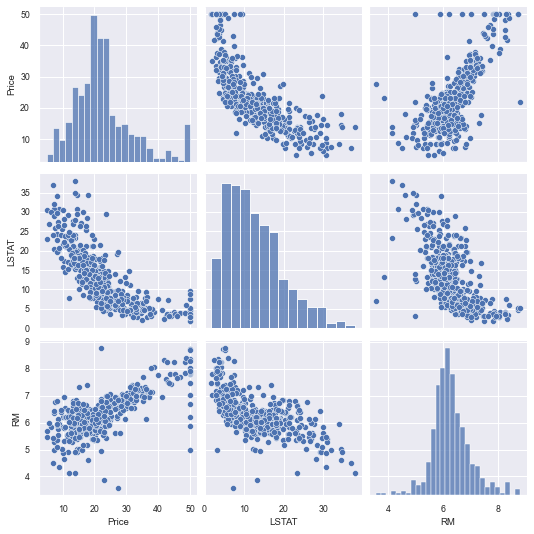

In [140]:
cols = ["Price", "LSTAT", "RM"]
sns.pairplot(data[cols])
plt.show()

- 산점도를 통해서 LSTAT가 증가할 때 Price가 하락하고
- RM이 증가할 때 Price도 함께 증가하는 것을 확인할 수 있다

### 학습모델 만들기

In [144]:
import numpy as np

x = pd.DataFrame(np.c_[data["LSTAT"], data["RM"]], columns=["LSTAT", "RM"])
y = data["Price"]

In [145]:
from sklearn.model_selection import train_test_split

# 학습한 모델을 test하기 위해 train data의 20%의 test data를 만든다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [150]:
# 선형회귀모형

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(model.coef_, 1))
print("상수항(절편):", np.round(model.intercept_, 1))

회귀계수(기울기): [-0.7  4.6]
상수항(절편): 2.7


### 학습모델 평가

In [148]:
from sklearn.metrics import mean_squared_error, r2_score

# train set에 대한 모델 평가
y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

# test set에 대한 모델 평가
y_train_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_train_predict)))
r2 = r2_score(y_test, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))

train set
price is 5.6371293350711955
R2 Score is 0.6300745149331701


train set
price is 5.13740078470291
R2 Score is 0.6628996975186954


## 3. Logistic Regression

* 로지스틱 회귀분석 *

 1) coef계수를 보고 음수이면 제외

 2) p-value값 확인 -> 0에 가까울수록 중요한 변수. 1에 가까우면 coef가 양수여도 제외함

 3) Odds ratio 보고 확률 판별 -> Odds 비율이 높을수록 확률이 높음

### Data

In [155]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [153]:
tit = sns.load_dataset("titanic")
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
# 문자열 숫자로 변환하기

tit['sex'] = tit['sex'].map({'female':1,'male':0})

In [161]:
# 결측값 평균으로 대체

tit['age'].fillna(value = tit['age'].mean(), inplace = True)

In [163]:
# 1등석, 2등석 컬럼 새로 생성

tit['FirstClass'] = tit['class'].apply(lambda x: 1 if x == 1 else 0)
tit['SecondClass'] = tit['class'].apply(lambda x: 1 if x == 2 else 0)

In [164]:
features = tit[['sex', 'age', 'FirstClass', 'SecondClass']]
survival = tit['alive']

### 학습모델 만들기

In [165]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

### 학습모델 평가

In [167]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [168]:
# train set으로 정확도 구하기

print(model.score(train_features, train_labels))

0.7859281437125748


- 대략 79% 정도 맞춤

In [169]:
# test set으로 정확도 구하기

print(model.score(test_features, test_labels))

0.7892376681614349


- 대략 77% 정도 맞춤

In [170]:
# coefficients 확인
# 어떤 feature가 생존에 큰 영향을 주는지 확인

print(model.coef_)

[[ 2.3743645  -0.00976199  0.          0.        ]]


- 성별이 1(여자), 1등석 탑승 여부가 중요함
- 나이에 대한 계수는 음수 -> 나이가 많을수록 생존확률 낮아짐